In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras import models
model=models.Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

Using TensorFlow backend.
W0828 10:42:04.129266 139799757653888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 10:42:04.172204 139799757653888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 10:42:04.179770 139799757653888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 10:42:04.208273 139799757653888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [4]:
import pandas as pd
import os
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
categories =[]
train_dir = '/content/drive/My Drive/Colab Notebooks/yjproject/dataset'
filenames = os.listdir(train_dir)
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'jimmy': categories.append(0)
    elif category == 'warmc': categories.append(1)
    else : categories.append(2)
df = pd.DataFrame({'filename' : filenames, 'category': categories})

W0828 10:42:11.515868 139799757653888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0828 10:42:11.535752 139799757653888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [5]:
df=df.sample(frac=1).reset_index(drop=True)
df.tail()

,filename,category
295,jimmy.27.jpg,0
296,lanvi.80.jpg,2
297,lanvi.46.jpg,2
298,warmc.75.jpg,1
299,jimmy.77.jpg,0


In [0]:
df['category'] = df['category'].replace({0:'jimmy',1: ' warmc', 2: 'lanvi'})
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.10, random_state=42)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [7]:
test_df.shape

(30, 2)

In [8]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    '/content/drive/My Drive/Colab Notebooks/yjproject/dataset',
                                                    x_col='filename', y_col='category',
                                                    target_size=(150,150), class_mode='categorical',
                                                    batch_size = 10)

test_generator = test_datagen.flow_from_dataframe(test_df,'/content/drive/My Drive/Colab Notebooks/yjproject/dataset',
                                                 x_col='filename', y_col='category', 
                                                  target_size=(150,150),
                                                  class_mode='categorical',
                                                 batch_size = 5)



Found 270 validated image filenames belonging to 3 classes.
Found 30 validated image filenames belonging to 3 classes.


In [9]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=3)
history = model.fit_generator(train_generator, steps_per_epoch=27,
                             epochs=20, validation_data=test_generator, 
                              validation_steps=6, callbacks=[earlystop])

W0828 10:42:26.650853 139799757653888 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0828 10:42:26.784904 139799757653888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/20
27/27 [==============================] - 114s 4s/step - loss: 1.1812 - acc: 0.4222 - val_loss: 1.2209 - val_acc: 0.3667
Epoch 2/20
27/27 [==============================] - 3s 112ms/step - loss: 0.7837 - acc: 0.7444 - val_loss: 0.0842 - val_acc: 0.9667
Epoch 3/20
27/27 [==============================] - 3s 113ms/step - loss: 0.3886 - acc: 0.9111 - val_loss: 0.0786 - val_acc: 1.0000
Epoch 4/20
27/27 [==============================] - 3s 115ms/step - loss: 0.0676 - acc: 0.9815 - val_loss: 0.0111 - val_acc: 1.0000
Epoch 5/20
27/27 [==============================] - 3s 114ms/step - loss: 0.0663 - acc: 0.9852 - val_loss: 0.0174 - val_acc: 1.0000
Epoch 6/20
27/27 [==============================] - 3s 112ms/step - loss: 0.0627 - acc: 0.9778 - val_loss: 0.0058 - val_acc: 1.0000
Epoch 7/20
27/27 [==============================] - 3s 116ms/step - loss: 0.0054 - acc: 1.0000 - val_loss: 5.7192e-04 - val_acc: 1.0000
Epoch 8/20
27/27 [==============================] - 3s 112ms/step - loss:

In [10]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 100.00%


In [11]:
import numpy as np
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{' warmc': 0, 'jimmy': 1, 'lanvi': 2}
[[0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.001 0.000 0.999]
 [0.000 0.000 1.000]
 [0.999 0.000 0.001]
 [0.000 0.000 0.999]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.998 0.000 0.002]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]]


In [0]:
model.save('perfume2.h5')

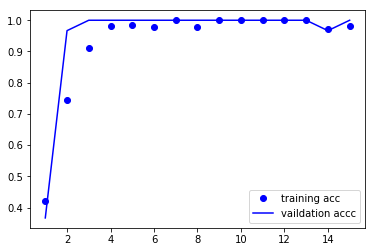

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='vaildation accc')
plt.legend()
plt.show()

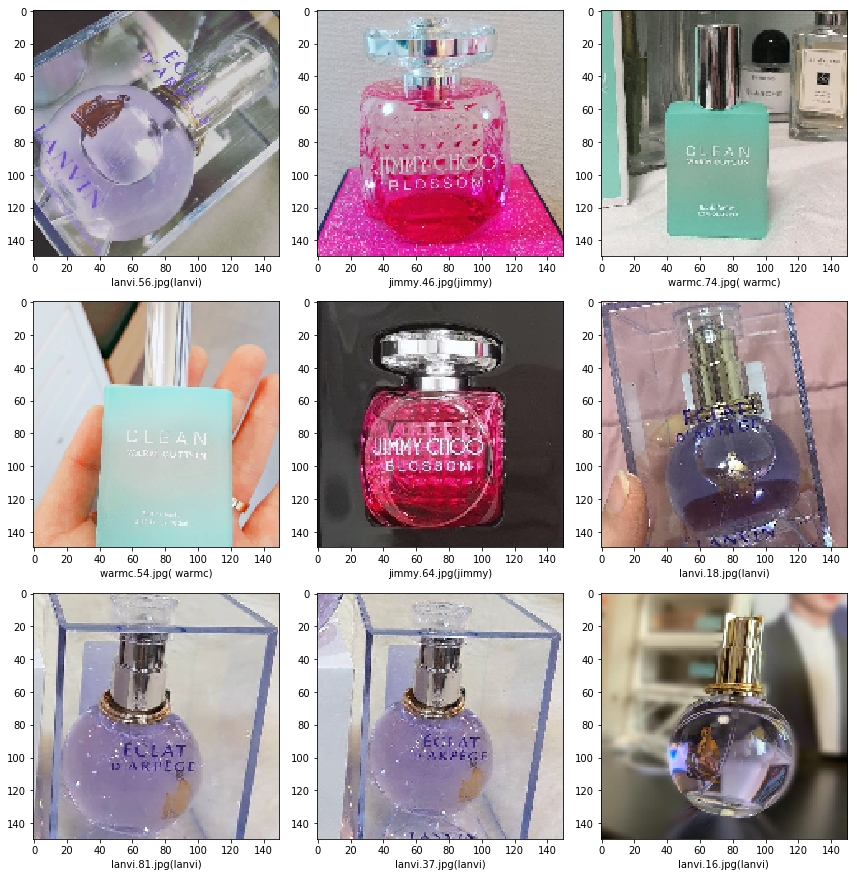

In [13]:
from keras.preprocessing.image import load_img
sample_test = test_df.head(9)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/drive/My Drive/Colab Notebooks/yjproject/dataset/"+filename, target_size=(150,150))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [16]:
test_df

,filename,category
0,lanvi.75.jpg,lanvi
1,warmc.43.jpg,warmc
2,warmc.77.jpg,warmc
3,jimmy.37.jpg,jimmy
4,warmc.28.jpg,warmc
5,warmc.89.jpg,warmc
6,warmc.22.jpg,warmc
7,warmc.94.jpg,warmc
8,lanvi.4.jpg,lanvi
9,warmc.16.jpg,warmc


In [29]:
new_filenames = os.listdir('/content/drive/My Drive/Colab Notebooks/yjproject/new_perfume')
new_df = pd.DataFrame({'filename' : new_filenames})
nb_samples = new_df.shape[0]
test_datagen1 = ImageDataGenerator(rescale=1./255)
test_generator1 = test_datagen1.flow_from_dataframe(new_df,'/content/drive/My Drive/Colab Notebooks/yjproject/new_perfume',
                                                 x_col='filename', y_col='None', 
                                                  target_size=(150,150),
                                                  class_mode=None,
                                                 batch_size = 2, shuffle = False)

Found 13 validated image filenames.


In [0]:
predict = model.predict_generator(test_generator1,
                                  steps=np.ceil(nb_samples/2))

In [51]:
predict

array([[0.001, 0.699, 0.300],
       [0.001, 0.983, 0.015],
       [0.007, 0.003, 0.990],
       [0.003, 0.002, 0.995],
       [0.000, 1.000, 0.000],
       [1.000, 0.000, 0.000],
       [0.110, 0.015, 0.875],
       [0.011, 0.004, 0.985],
       [0.003, 0.002, 0.995],
       [0.011, 0.004, 0.985],
       [0.000, 1.000, 0.000],
       [0.006, 0.023, 0.971],
       [1.000, 0.000, 0.000]], dtype=float32)

In [0]:
new_df['category'] = np.argmax(predict, axis=-1)

In [34]:
print(test_generator.class_indices)


{' warmc': 0, 'jimmy': 1, 'lanvi': 2}


In [0]:
new_df['category'] = new_df['category'].replace({0:'warmc', 1: 'jimmy', 2: 'lanvi'})

In [50]:
new_df

,filename,category,probability
0,NB128sample_NB_0.jpg,jimmy,0.999961
1,NB128sample_NB_1.jpg,jimmy,0.999961
2,NB128sample_NB_6.jpg,lanvi,0.999961
3,NB128sample_NB_7.jpg,lanvi,0.999961
4,NB128sample_NB_9.jpg,jimmy,0.999961
5,NB128sample_NB_11.jpg,warmc,0.999961
6,NB128sample_NB_2.jpg,lanvi,0.999961
7,NB128sample_NB_5.jpg,lanvi,0.999961
8,NB128sample_NB_4.jpg,lanvi,0.999961
9,NB128sample_NB_8.jpg,lanvi,0.999961


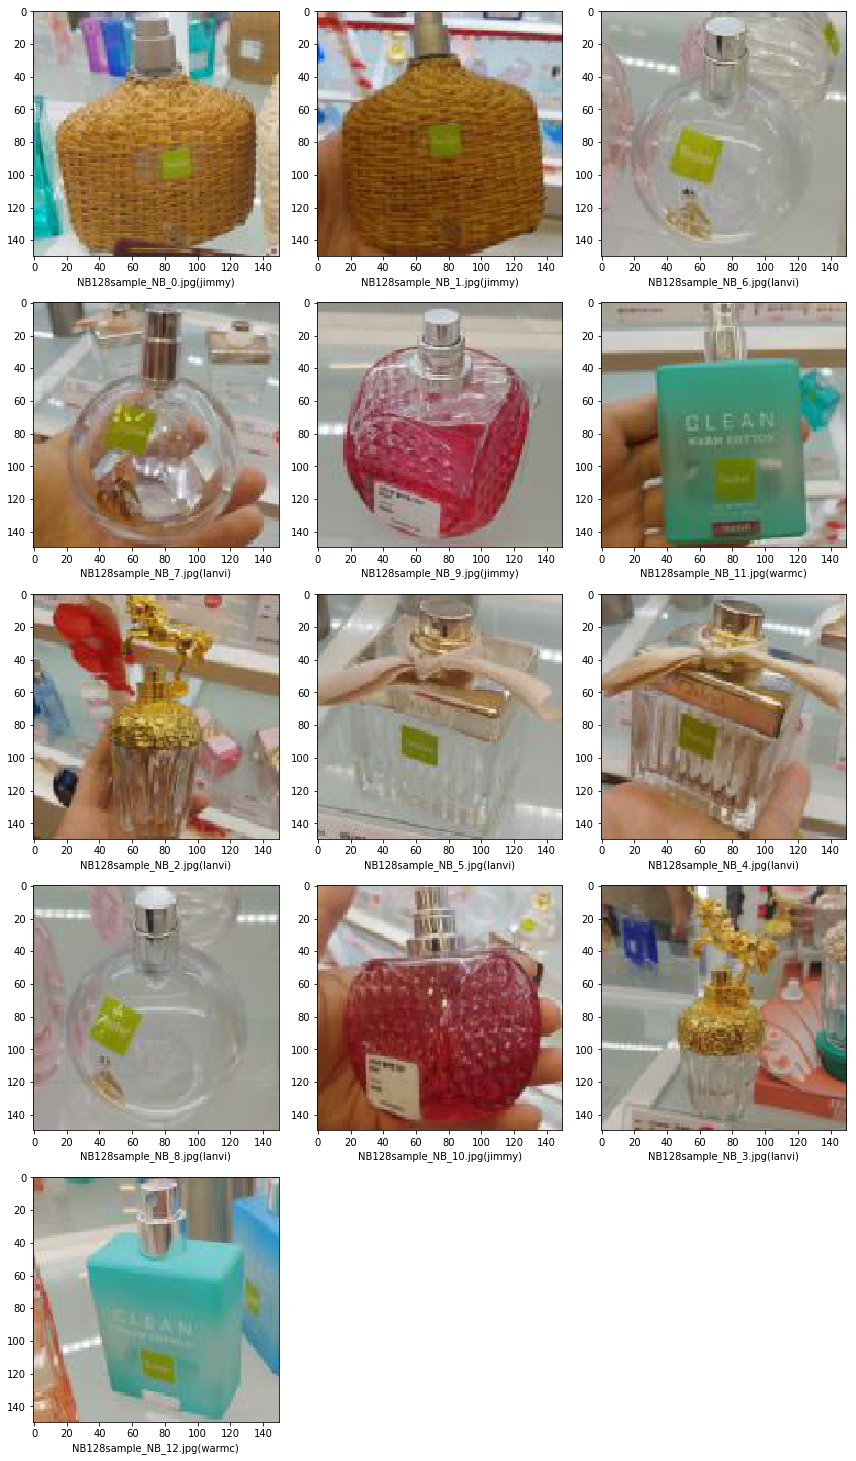

In [39]:
sample_test = new_df.head(13)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/drive/My Drive/Colab Notebooks/yjproject/new_perfume/"+filename, target_size=(150,150))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()